Looking at data from runs on Feb 12


generated weights, tract lengths and conduction velocity, 10 nodes
with constant intial conditions and then random

thresholded the weights when estimating

Tryign to see if it changes multiplicity of conditions

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [2]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [3]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""
constant init cond
944933
944932
944931


random init cond
944925
944929
944930

"""
NTASKS =40
JOB= ['944933', '944932','944931','944925','944929', '944930']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [4]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 6


{'944925': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944925/load_genvars_delays1b944861.py',
 '944929': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944929/load_genvars_delays2b944860.py',
 '944930': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944930/load_genvars_delays3b944859.py',
 '944931': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944931/load_genvars_delays3944858.py',
 '944932': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944932/load_genvars_delays2944857.py',
 '944933': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-12/944933/load_genvars_delays1944856.py'}

In [5]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 944933, lowest MSE:  0.0277007674108282
1  Job: 944932, lowest MSE:  0.0358007774683482
2  Job: 944931, lowest MSE:  0.0337957901062166
3  Job: 944925, lowest MSE:  0.04067609442194781
4  Job: 944929, lowest MSE:  0.030894889264051102
5  Job: 944930, lowest MSE:  0.029021133303515495


Plot of MEG time series of Target Data and Correlation Matrix

/gpfs/fs0/scratch/l/lfefebvr/noorir/model/helper_functions.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

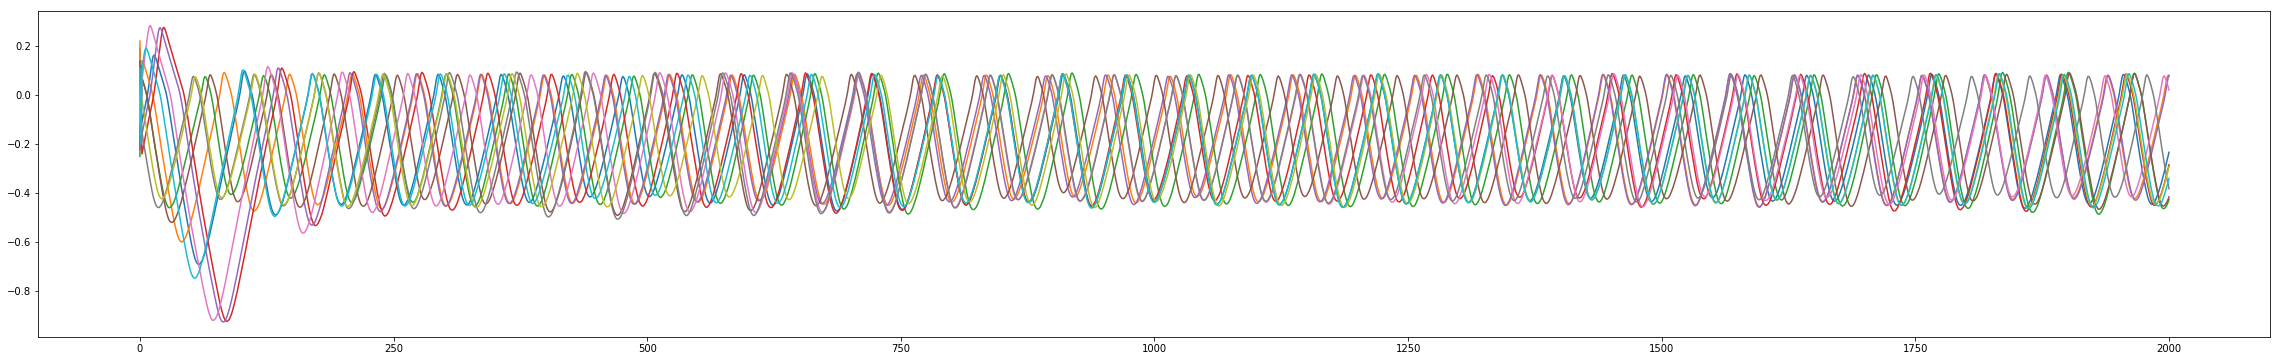

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

exec(open(load_files[JOB[0]]).read())
plot_ts(nodes, ue_array)

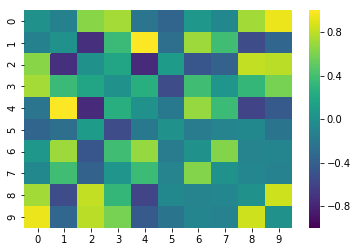

In [7]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

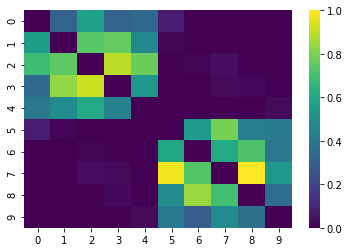

In [8]:
sns.heatmap(w_mat, vmax = 1, vmin = 0, cmap = "viridis")

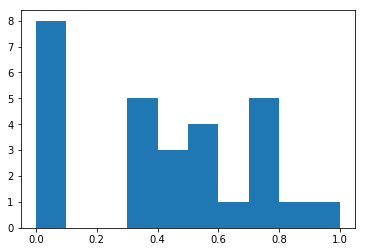

In [9]:
vals = np.triu(w_mat,1).ravel()
vals_n = vals[vals>0]
plt.hist(vals_n)
plt.show()

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  944933 min: -0.8378709232058549 max: 0.9973300459157077 avg: -0.0015160203532557143
2 JOB #:  944932 min: -0.8908168698963734 max: 0.8898465152528248 avg: -0.0036186171978390075
3 JOB #:  944931 min: -0.7037512629380016 max: 0.8809371304924496 avg: 0.023901796608291687
4 JOB #:  944925 min: -0.7846567319464463 max: 0.9377036435998598 avg: 0.13583852326264081
5 JOB #:  944929 min: -0.9914227169896377 max: 0.835851687783344 avg: -0.07585956068852313
6 JOB #:  944930 min: -0.9486424879365972 max: 0.7686865849866567 avg: 0.051092568315549175


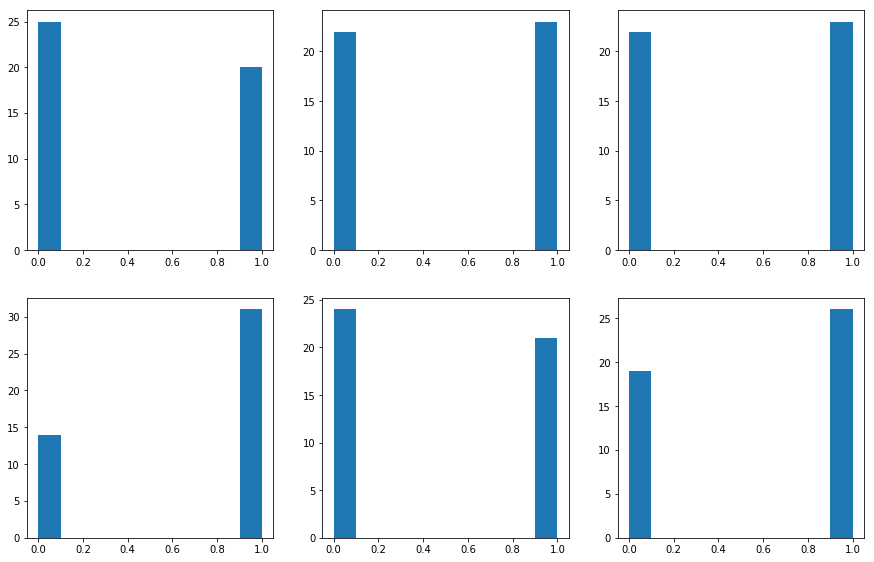

In [11]:
plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(3, 3, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    val = np.heaviside(all_res[JOB[i]],0.5)
    plt.hist(val, range= (0,1))
    #row major counting


In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

JOB #: 944933, max: 0.9973300459157077 min: -0.8378709232058549
JOB #: 944932, max: 0.8898465152528248 min: -0.8908168698963734
JOB #: 944931, max: 0.8809371304924496 min: -0.7037512629380016
JOB #: 944925, max: 0.9377036435998598 min: -0.7846567319464463
JOB #: 944929, max: 0.835851687783344 min: -0.9914227169896377
JOB #: 944930, max: 0.7686865849866567 min: -0.9486424879365972


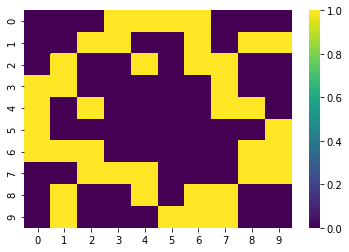

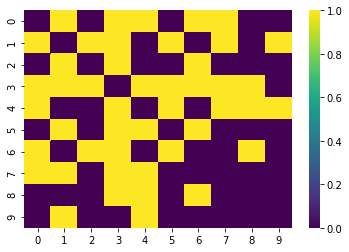

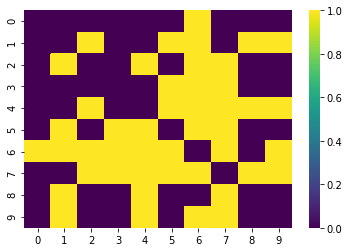

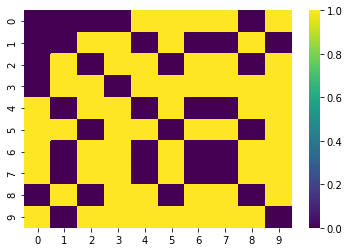

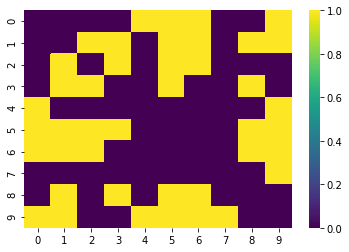

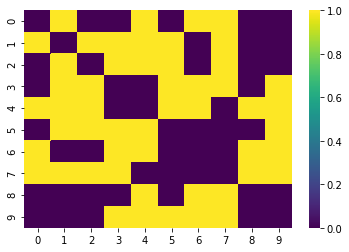

In [12]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            mat[row,col] = np.heaviside(all_res[JOB[i]][ind],0.5)
            mat[col,row] = np.heaviside(all_res[JOB[i]][ind],0.5)
            ind += 1
    np.fill_diagonal(mat,0)
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    plt.figure()
    sns.heatmap(mat, vmax = 1, vmin = 0, cmap = "viridis")

here
2000
constant
10


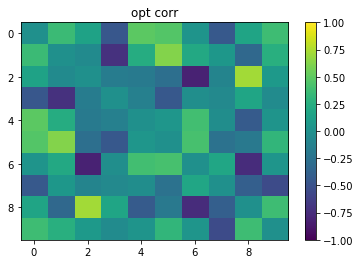

MSE 0.120562235604
JOB #: 944933, max: 0.9973300459157077 min: -0.8378709232058549
here
2001
constant
10


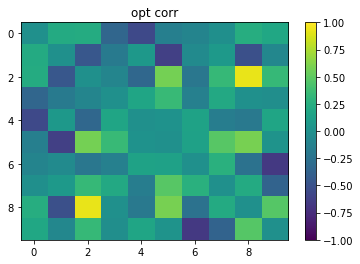

MSE 0.101687175949
JOB #: 944932, max: 0.8898465152528248 min: -0.8908168698963734
here
2002
constant
10


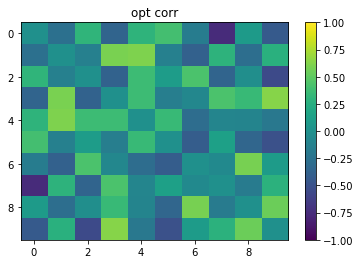

MSE 0.158255637792
JOB #: 944931, max: 0.8809371304924496 min: -0.7037512629380016
here
2000
not constant
10


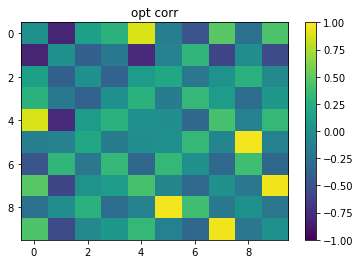

MSE 0.186692972182
JOB #: 944925, max: 0.9377036435998598 min: -0.7846567319464463
here
2001
not constant
10


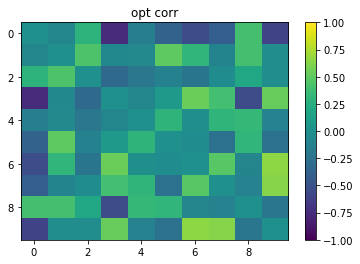

MSE 0.172549341749
JOB #: 944929, max: 0.835851687783344 min: -0.9914227169896377
here
2002
not constant
10


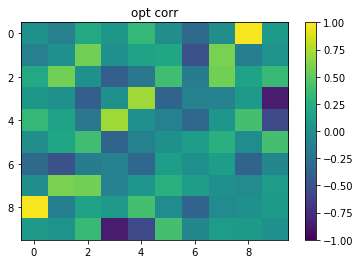

MSE 0.152629068248
JOB #: 944930, max: 0.7686865849866567 min: -0.9486424879365972


In [13]:
"""
    if plot == "corr":
        np.fill_diagonal(exp_data, 0)
        plot_mat(exp_data,"opt corr", 1, -1)
        print("MSE", res)
    if plot == "delay":
        plot_mat(delays,"Delays")
    if plot == "cw":
        if optim =="c":
            plot_mat(cmat, "opt c",  0.0005, 0)
        if optim =="w":
            plot_mat(wmat, "opt w", 0, 1)
"""
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
    hf.residuals_cw_corr(all_res[JOB[i]], wc_params, targ_data, nodes, tract_mat, MAT, skip, 
                         wc_seed, evol_params['optim'],plot = "corr")

    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))

Conclusion: Doesn't seem like making thresholding the weights changes the multiciplity of solutions